In [11]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

`i` : 喷管位置

In [12]:
gamma = 1.4 
deltaX = 0.1
start, end = 0, 3
xs = np.linspace(start, end, (int)((end - start)//deltaX) + 2)
print(xs)
sz = xs.shape[0]
As = np.array([0.0] * sz)
mid1_5 = int(sz // 2 + 1) # x = 1.5时对应的节点
print(mid1_5)
for i in range(mid1_5):
    As[i] = 1 + 2.2 * (xs[i] - 1.5) ** 2
for i in range(mid1_5, sz):
    As[i] = 1 + 0.2223 * (xs[i] - 1.5) ** 2
print(As)
pN = (1 - 0.023 * 3) * (1 - 0.000933 * 3)
pe = 0.6784

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3. ]
16
[5.95     5.312    4.718    4.168    3.662    3.2      2.782    2.408
 2.078    1.792    1.55     1.352    1.198    1.088    1.022    1.
 1.002223 1.008892 1.020007 1.035568 1.055575 1.080028 1.108927 1.142272
 1.180063 1.2223   1.268983 1.320112 1.375687 1.435708 1.500175]


In [20]:
ts = [0] # 时间
rhos = [1 if x <= 0.5 else 1 - 0.366 * (x - 0.5) if x <= 1.5 else 0.634 - 0.702 * (x - 1.5) if x <= 2.1 else 0.5892 - 0.10228 * (x - 2.1) for x in xs]
print(rhos)
Ts = [1 if x <= 0.5 else 1 - 0.167 * (x - 0.5) if x <= 1.5 else 0.833 - 0.4908 * (x - 1.5) if x <= 2.1 else 0.93968 - 0.0622 * (x - 2.1) for x in xs]
Vs = [0.59 / rhos[i] / As[i] for i, x in enumerate(xs)]

print(0.05 + 0.11 * 0.1 * np.sqrt(1 - 0.2314 * 0.1))
rho_mid = [rhos[16]]
V_mid = [Vs[16]]
T_mid = [Ts[16]]
rho_t_mid = [0]
rho_t_mid2 = [0]

for it in range(5000):
    print('rhos: ', rhos)
    print('Ts: ', Ts)
    print('Vs: ', Vs)
    rho_t = np.array([-rhos[i] * (Vs[i + 1] - Vs[i]) / deltaX - Vs[i] * (rhos[i + 1] - rhos[i]) / deltaX - rhos[i] * Vs[i] * (np.log(As[i + 1]) - np.log(As[i])) / deltaX for i in range(sz - 1)])
    V_t = np.array([- Vs[i] * (Vs[i + 1] - Vs[i]) / deltaX - 1 / gamma * ((Ts[i + 1] - Ts[i]) / deltaX + Ts[i] / rhos[i] * (rhos[i + 1] - rhos[i]) / deltaX) for i in range(sz - 1)])
    T_t = np.array([- Vs[i] * (Ts[i + 1] - Ts[i]) / deltaX - (gamma - 1) * Ts[i] * ((Vs[i + 1] - Vs[i]) / deltaX + Vs[i] * (np.log(As[i + 1]) - np.log(As[i])) / deltaX) for i in range(sz - 1)])
    print(rho_t)
    print(V_t)
    print(T_t)
    print('---------')
    deltats = [deltaX / (Vs[i] + np.sqrt(Ts[i])) for i in range(1, sz - 1)]
    deltat = 0.5 * np.min(deltats)
    # print(deltats)
    # print(Ts)
    # print(Vs)
    # print(rhos)
    # print("-------------------------------")
    ts += [ts[-1] + deltat] # ts = ts + [ts[-1] + deltat]
    rho_t2 = np.append(rho_t, rho_t[-1])
    V_t2 = np.append(V_t, V_t[-1])
    T_t2 = np.append(T_t, T_t[-1])

    rhoY = rhos 
    VY = Vs 
    TY = Ts 
    rhos = rhos + rho_t2 * deltat 
    Vs = Vs + V_t2 * deltat 
    Ts = Ts + T_t2 * deltat 

    rho_t = np.array([-rhos[i] * (Vs[i] - Vs[i - 1]) / deltaX - Vs[i] * (rhos[i] - rhos[i - 1]) / deltaX - rhos[i] * Vs[i] * (np.log(As[i]) - np.log(As[i - 1])) / deltaX for i in range(1, sz)])
    V_t = np.array([- Vs[i] * (Vs[i] - Vs[i - 1]) / deltaX - 1 / gamma * ((Ts[i] - Ts[i - 1]) / deltaX + Ts[i] / rhos[i] * (rhos[i] - rhos[i - 1]) / deltaX) for i in range(1, sz)])
    T_t = np.array([- Vs[i] * (Ts[i] - Ts[i - 1]) / deltaX - (gamma - 1) * Ts[i] * ((Vs[i] - Vs[i - 1]) / deltaX + Vs[i] * (np.log(As[i]) - np.log(As[i - 1])) / deltaX) for i in range(1, sz)])

    rho_t = np.hstack([rho_t[0], rho_t])# [1, 2, 0.7, ...] -> [1, 1, 2, 0.7, ...]
    V_t = np.hstack([V_t[0], V_t])
    T_t = np.hstack([T_t[0], T_t])

    # 计算时间偏导数的平均值，计算矫正值
    rhos = rhoY + 0.5 * (rho_t + rho_t2) * deltat 
    Vs = VY + 0.5 * (V_t + V_t2) * deltat 
    Ts = TY + 0.5 * (T_t + T_t2) * deltat 

    # 边界条件
    rhos[0] = 1 
    Ts[0] = 1
    Vs[0] = 2 * Vs[1] - Vs[2] 
    Vs[-1] = 2 * Vs[-2] - Vs[-3]
    # Ts[-1] = 2 * Ts[-2] - Ts[-3] 
    # rhos[-1] = 0.93 / Ts[-1]
    rhos[-1] = 2 * rhos[-2] - rhos[-3]
    Ts[-1] = pe / rhos[-1]
    print(rhos[-1], Ts[-1], rhos[-1] * Ts[-1])

    print(rhos)
    print(Vs)
    print(Ts)
    # 记录喉道数据
    rho_mid += [rhos[16]]
    V_mid += [Vs[16]]
    T_mid += [Ts[16]]
    rho_t_mid += [rho_t[16]]
    rho_t_mid2 += [rho_t2[16]]

    


nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
---------
nan nan nan
[ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
[ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan]
rhos:  [ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan n

KeyboardInterrupt: 

In [14]:
import math
Mas = [Vs[i] / math.sqrt(Ts[i]) for i in range(sz)]
print(Mas)
Mae=np.sqrt((pe**((-gamma+1)/gamma)-1)*2/(gamma-1))
A_= As[-1] / np.sqrt(Mae**(-2)*(2/(gamma+1)*(1+(gamma-1)/2*Mae**2))**((gamma+1)/(gamma-1)))
print('A_ == ', A_)
from scipy.optimize import fsolve 
Ma_exact = []
for i in range(sz):
    x=deltaX*i
    thisA=As[i]
    def func(Ma:int):
        return (thisA/A_)**2-Ma**(-2)*(2/(gamma+1)*(1+(gamma-1)/2*Ma**2))**((gamma+1)/(gamma-1))
    # print(fsolve(func,Mas[i]))
    Ma_exact.append(fsolve(func,Mas[i])[0])
print(Ma_exact)

[0.09915966386554621, 0.11106927710843374, 0.1250529885544722, 0.14155470249520152, 0.16111414527580553, 0.18437499999999998, 0.22199603842542615, 0.268897093848801, 0.32725021054489756, 0.39927510709222835, 0.48666713868862355, 0.5895017041421976, 0.7045861096836801, 0.8237997246617141, 0.9339094235084415, 1.0196244781882573, 1.1793065282007098, 1.3820882922511533, 1.6497264256506345, 2.021585393652931, 2.5765322725608586, 3.498198543528296, 0.9511382267143186, 0.9431256863287035, 0.9327745077238929, 0.9204546181517074, 0.9065336174554748, 0.8913650447545742, 0.8752796332422355, 0.8585794459141547, 0.84153457459865]
A_ ==  1.4232129735418693
[0.1400589262153342, 0.15736383148771313, 0.177905584698689, 0.20250740835510417, 0.23226847955515514, 0.2686915628133653, 0.31390282798090513, 0.37107840087694544, 0.4454329187962608, 0.5472362155093651, 0.7074204652299394, 1.0005110017356003, 1.0000995429857371, 0.9999677691598359, 1.0003536608031187, 1.0056144058136873, 0.9985815430478621, 1.00

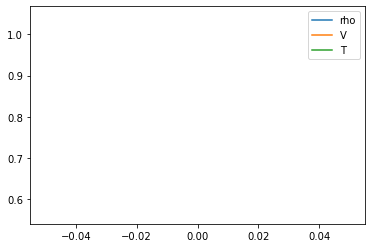

In [15]:
plt.plot(ts, rho_mid)
plt.plot(ts, V_mid)
plt.plot(ts, T_mid)
plt.legend(['rho', 'V', 'T'])

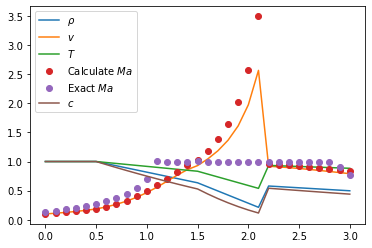

In [16]:
plt.plot(xs, rhos)
plt.plot(xs, Vs, )
plt.plot(xs, Ts)
plt.plot(xs, Mas, 'o')
plt.plot(xs, Ma_exact, 'o')
plt.plot(xs, [Ts[i] * rhos[i] for i in range(sz)])
plt.legend([r'$\rho$', r'$v$', r'$T$', r'Calculate $Ma$', r'Exact $Ma$', r'$c$'])
plt.show()

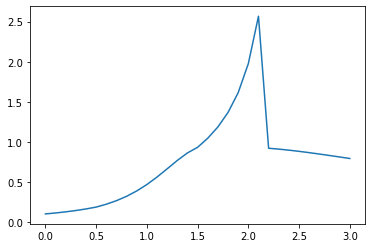

In [17]:
plt.plot(xs, Vs)

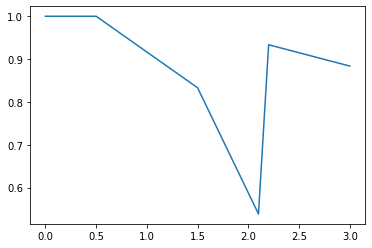

In [18]:
plt.plot(xs, Ts)

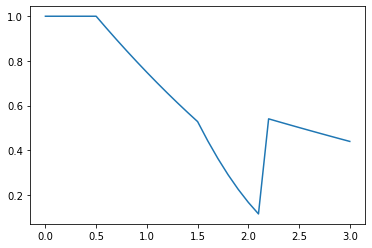

In [19]:
plt.plot(xs, [Ts[i] * rhos[i] for i in range(sz)])